### Prediction Diabetes

## Import Libraries

In [1]:
import pandas as pd    # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np

# do ploting inline instead of in a separate window
%matplotlib inline

## load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [6]:
df.shape

(768, 10)

In [7]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


## Check for null value

In [9]:
df.isnull().values.any()

False

In [17]:
def plot_corr(df, size = 11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the data frame
    Input: 
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Display:
        matrix of correlation between columns. Blue-cyan-yellow-red-darked => less to more correlated 
                                                0 --------------------> 1
                                                Expect a darked line running from top left to bottom right
    """
    corr = df.corr()  # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)  # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    

In [12]:
df.shape[1]

10

In [13]:
df.shape

(768, 10)

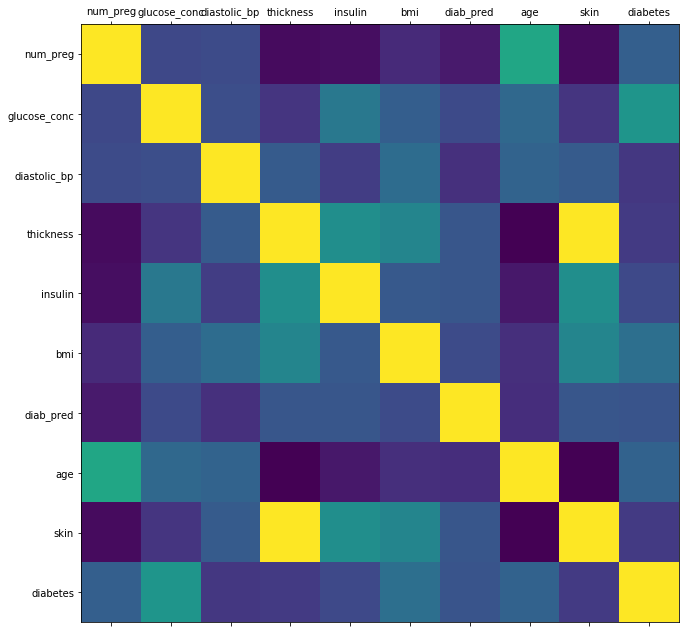

In [19]:
plot_corr(df)

In [20]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [3]:
del df['skin']

In [7]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


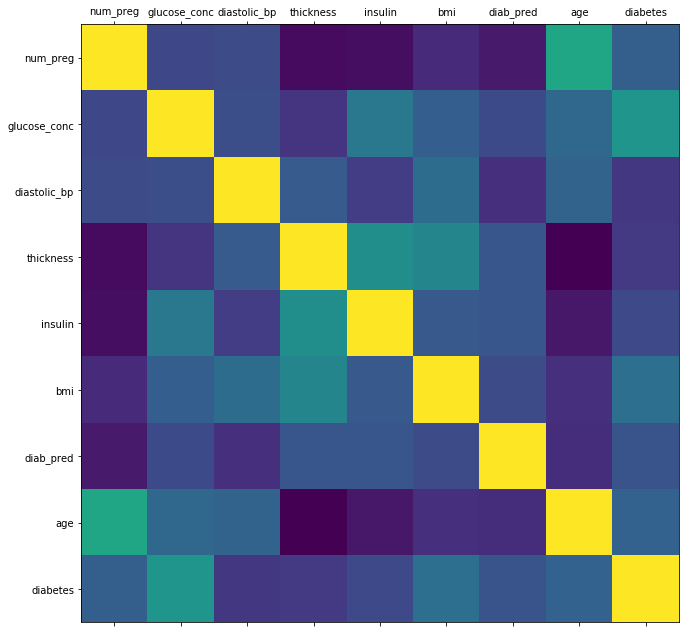

In [23]:
plot_corr(df)

## Check data types

In [24]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0

In [3]:
diabetes_map = {True: 1, False: 0}

In [4]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [5]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


## Check True False Ratio

In [6]:
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


### Spliting the data
70% for training, 30% for testing

In [7]:
from sklearn.cross_validation import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values       #predictor feature columns (8 x m)
y = df[predicted_class_names].values   #predictor class (1 = true, 0 = false) column (1 x m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

c:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
print("{0:0.2f}% in traing set".format((len(X_train) / len(df.index)) * 100.0))
print("{0:0.2f}% in test set".format((len(X_test) / len(df.index)) * 100.0))

69.92% in traing set
30.08% in test set


#### verifying predicted value was split correctly

In [9]:
print("Original true: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), len(df.loc[df['diabetes'] == 1]) / len(df.index) ))
print("Original false: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), len(df.loc[df['diabetes'] == 0]) / len(df.index) ))

print("Train true: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) ))
print("Train false: {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) ))

print("Test true: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) ))
print("Test false: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) ))

#print("Train false: {0} ({1:0.2f}%)".format(len(y_train[y['diabetes'] == 0]), len(y_train[y['diabetes'] == 0]) / len(y_train.index) ))

#print("Test true: {0} ({1:0.2f}%)".format(len(y_test[df['diabetes'] == 1]), len(y_test[df['diabetes'] == 1]) / len(y_test.index) ))
#print("Test false: {0} ({1:0.2f}%)".format(len(y_test[df['diabetes'] == 0]), len(y_test[df['diabetes'] == 0]) / len(y_test.index) ))


Original true: 268 (0.35%)
Original false: 500 (0.65%)
Train true: 188 (0.35%)
Train false: 349 (0.65%)
Test true: 80 (0.35%)
Test false: 151 (0.65%)


### Post-split Data Preparation

#### Hidden Missing values

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are there 0 values possible? 
How many rows have unexpected 0 values?

In [31]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [10]:
columns = df.columns
column_len = len(columns)
print("{0} rows in data frame".format(len(df)))
for i in range(column_len - 1):
    column = columns[i]
    print("# rows missing {0}: {1}".format(column, len(df.loc[df[column] == 0])))

768 rows in data frame
# rows missing num_preg: 111
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0
# rows missing skin: 227


In [11]:
from sklearn.preprocessing import Imputer
# Impute with mean all 0 readings
fill_0 = Imputer(missing_values = 0, strategy="mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

### Training Initial Algorithm - Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

# Testing 

## Performance on Training Data

In [13]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0: .4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy:  0.7542



## Performance on Testing Data

In [14]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()


Accuracy: 0.7359



## Metrics

In [15]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

### Predict Training Data

In [17]:
rf_predict_train = rf_model.predict(X_train)
# training data metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [18]:
### Predict Test Data
rf_predict_test = rf_model.predict(X_test)
# testing data metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [19]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



In [21]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))
print ("Recall Score")
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7446
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.55      0.60        80
          0       0.78      0.85      0.81       151

avg / total       0.74      0.74      0.74       231

Recall Score
0.55


### Setting regularization parameter

1st max value of 0.613 occured at C=1.400


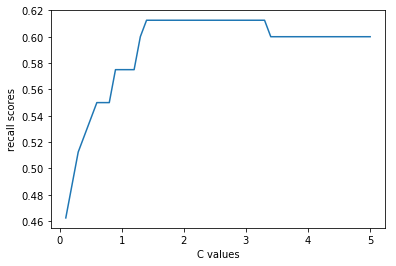

In [32]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall scores")

## Logistic regression with class_weight = 'balanced'

1st max value of 0.738 occured at C=0.300


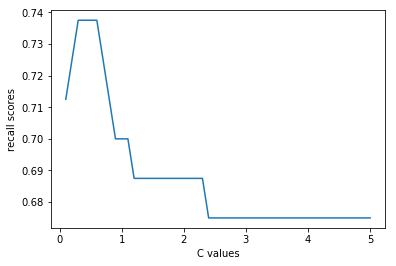

In [33]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight='balanced', random_state = 42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall scores")

In [34]:
lr_model = LogisticRegression( class_weight = "balanced",  C = best_score_C_val, random_state = 42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))
print ("Recall Score")
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

Recall Score
0.7375


## Logistic Regression Cross Validation

In [36]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Predict on test data

In [38]:
lr_cv_predict_test = lr_cv_model.predict(X_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1, 0]))
print ("Recall Score")
print(metrics.recall_score(y_test, lr_cv_predict_test))

Accuracy: 0.6926
[[ 52  28]
 [ 43 108]]

Classification Report
             precision    recall  f1-score   support

          1       0.55      0.65      0.59        80
          0       0.79      0.72      0.75       151

avg / total       0.71      0.69      0.70       231

Recall Score
0.65


In [39]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
